In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train = pd.read_csv('./datasets/train.csv')
test=pd.read_csv('./datasets/test.csv')
sample=pd.read_csv('./datasets/sample_submission.csv')

In [87]:
train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [88]:
test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


In [5]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
## 컬럼명 컬럼 설명
id,아이디
base_date,날짜
day_of_week,요일
base_hour,시간대
road_in_use,도로사용여부 // 배제(이미 없음)
lane_count,차로수 // 배제
road_rating,도로등급 // 보류 
multi_linked,중용구간 여부 // 보류
connect_code,연결로 코드 // 보류
maximum_speed_limit,최고속도제한 
weight_restricted,통과제한하중 // 보류
height_restricted,통과제한높이 // 배제
road_type,도로유형
start_latitude,시작지점의 위도
start_longitude,시작지점의 경도
start_turn_restricted,시작 지점의 회전제한 유무
end_latitude,도착지점의 위도
end_longitude,도착지점의 경도
end_turn_restricted,도작지점의 회전제한 유무
road_name,도로명
start_node_name,시작지점명
end_node_name,도착지점명
vehicle_restricted,통과제한차량 // 배제
target,평균속도(km)


In [90]:
# 테스트테이터 훈련데이터 합치기
all_data = pd.concat([train, test], axis=0, ignore_index=True) 
all_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992453,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음,NaN
4992454,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,NaN
4992455,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,NaN
4992456,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음,NaN


In [91]:
# 테이블 드랍
all_data=all_data.drop('lane_count',axis=1)
all_data=all_data.drop('height_restricted',axis=1)
all_data=all_data.drop('vehicle_restricted',axis=1)

In [92]:
# 파생 변수 생성 및 변경
all_data["base_date"] = pd.to_datetime(all_data["base_date"],format='%Y%m%d')
all_data['year']= all_data['base_date'].dt.year
all_data['month']= all_data['base_date'].dt.month
all_data['day']= all_data['base_date'].dt.day

# train["base_hour"] = [str(x) for x in train["base_hour"]]

In [95]:
# 데이터 나누기
test=all_data[np.isnan(all_data['target'])]
train=all_data[~np.isnan(all_data['target'])]

<AxesSubplot:ylabel='road_type'>

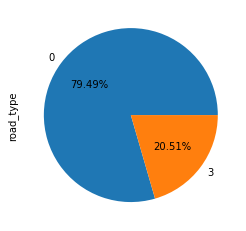

In [47]:
data = train['road_type'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')

[Text(0.5, 1.0, 'density target')]

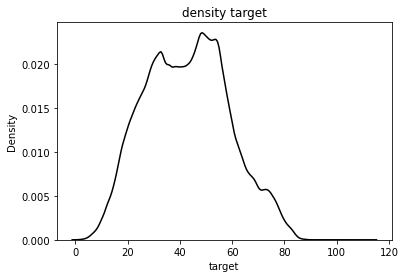

In [48]:
sns.kdeplot(x=train['target'], color='black').set(title='density target')

<AxesSubplot:xlabel='base_date', ylabel='target'>

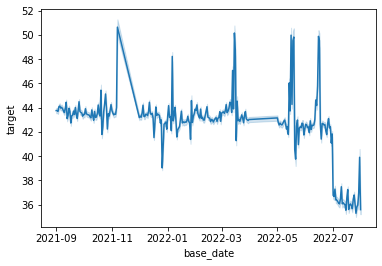

In [49]:
sns.lineplot(x='base_date',y='target',data=train)

<AxesSubplot:xlabel='base_hour', ylabel='target'>

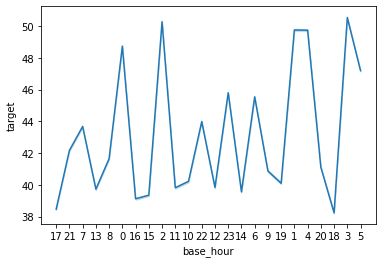

In [50]:
sns.lineplot(x='year',y='target',data=train)

<AxesSubplot:xlabel='month', ylabel='target'>

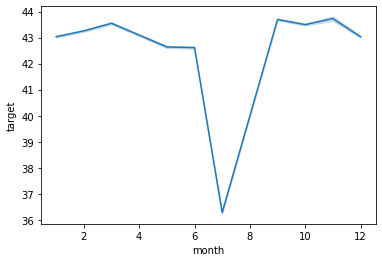

In [96]:
sns.lineplot(x='month',y='target',data=train)

<AxesSubplot:xlabel='day', ylabel='target'>

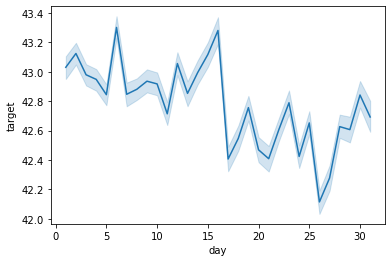

In [97]:
sns.lineplot(x='day',y='target',data=train)

In [ ]:
sns.barplot(data=train, x='road_name', y='target')

<AxesSubplot:xlabel='road_name', ylabel='target'>

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pl

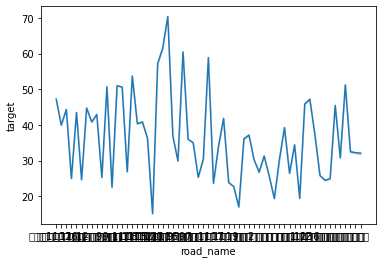

In [41]:
sns.lineplot(x='road_name',y='target',data=train,)

<AxesSubplot:xlabel='base_hour', ylabel='target'>

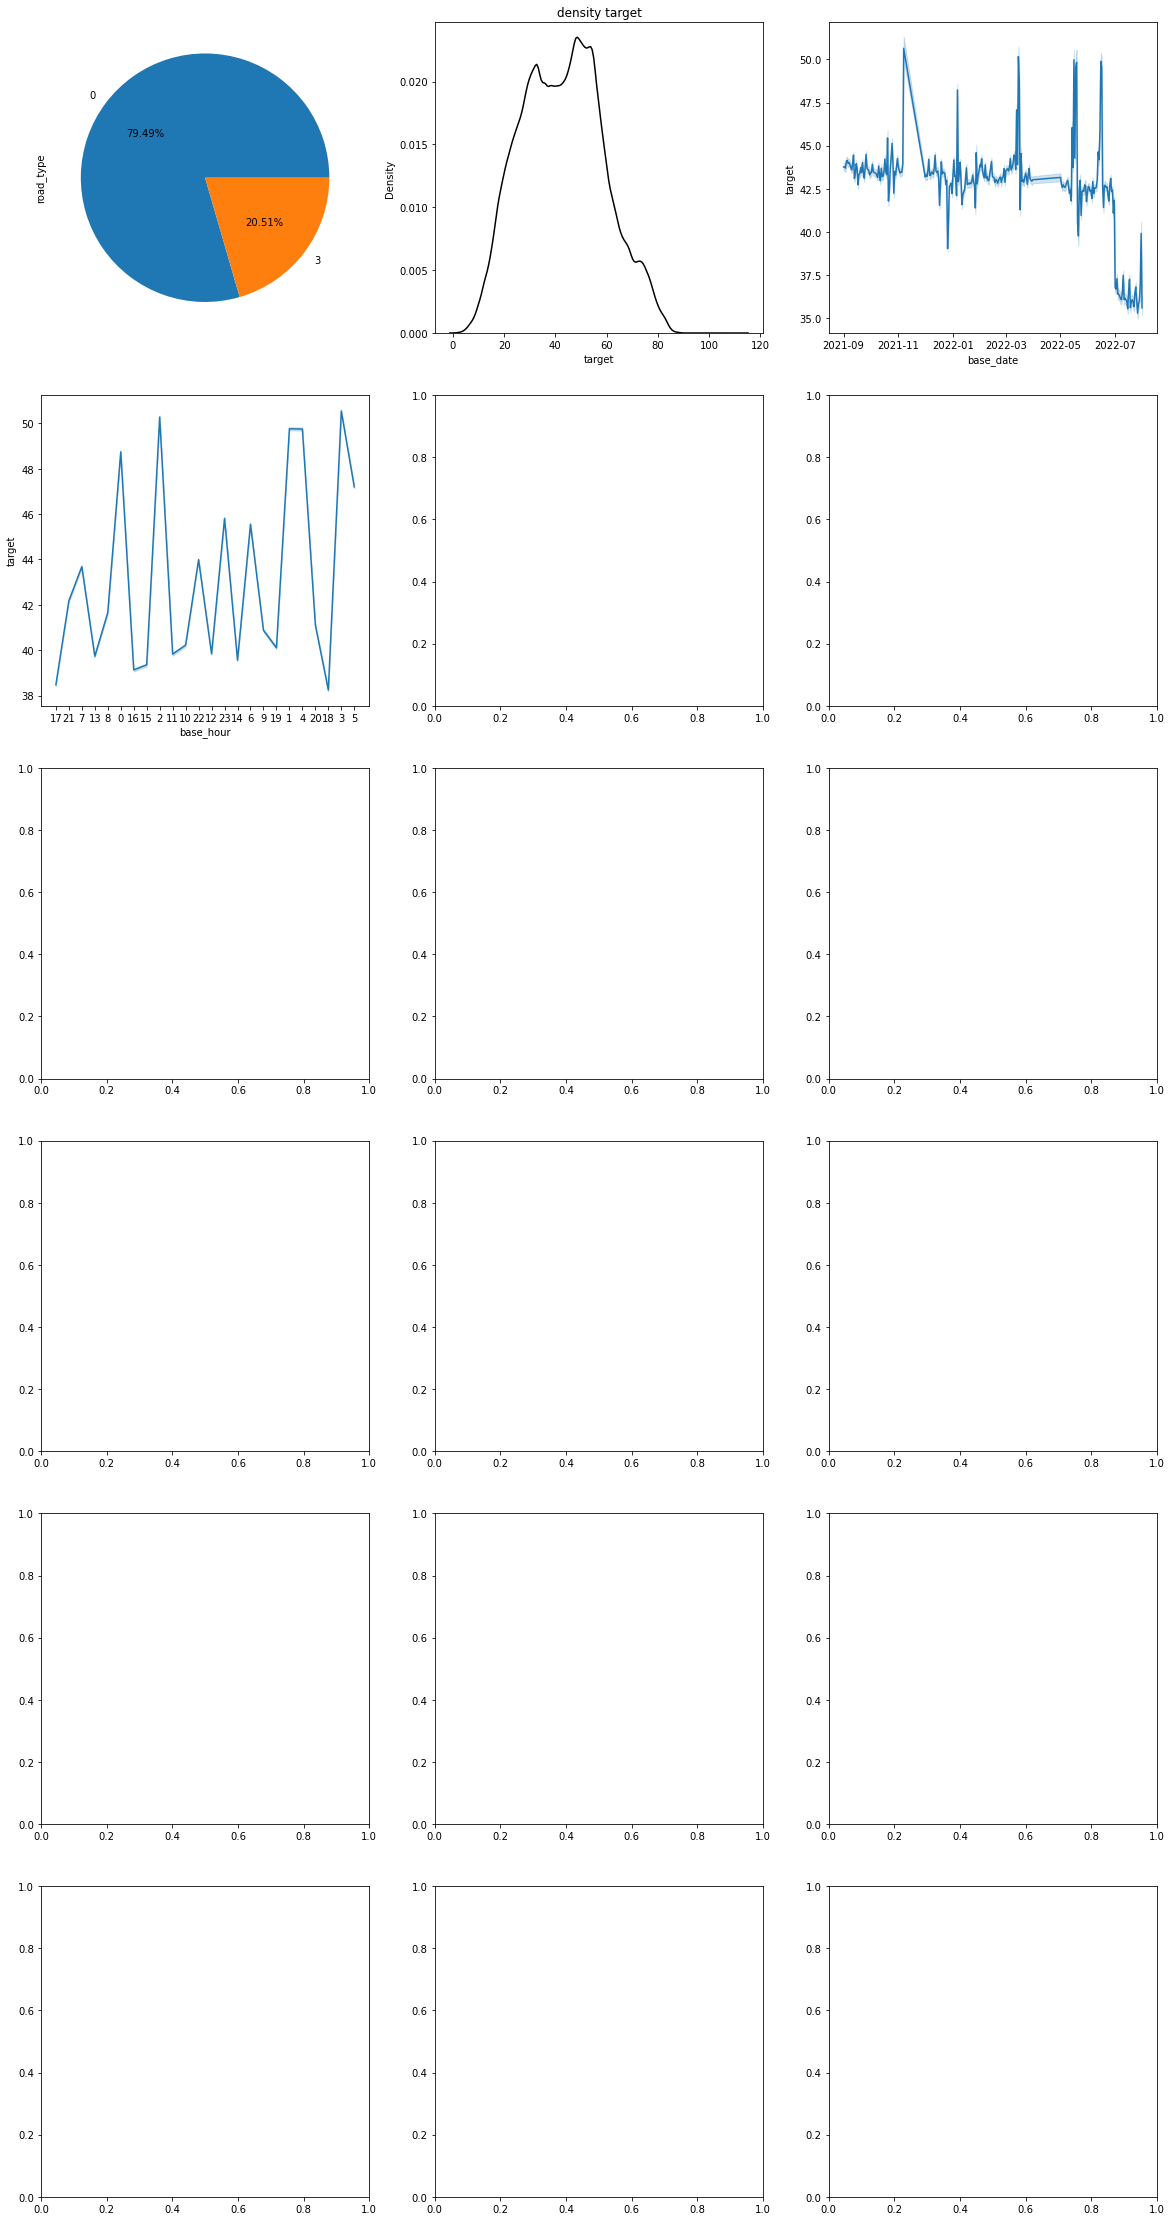

In [37]:
fig, axes = plt.subplots(6, 3, figsize=(20,40))
data = train['road_type'].value_counts()
data.plot(kind='pie', autopct='%.2f%%',ax=axes[0][0])
sns.kdeplot(x=train['target'], color='black',ax=axes[0][1]).set(title='density target')
sns.lineplot(x='base_date',y='target',data=train,ax=axes[0][2])
sns.lineplot(x='base_hour',y='target',data=train,ax=axes[1][0])
sns.barplot(data=train, x='road_type', y='target',ax=axes[1][1])
sns.barplot(data=train, x='road_type', y='target',ax=axes[1][2])

<AxesSubplot:>

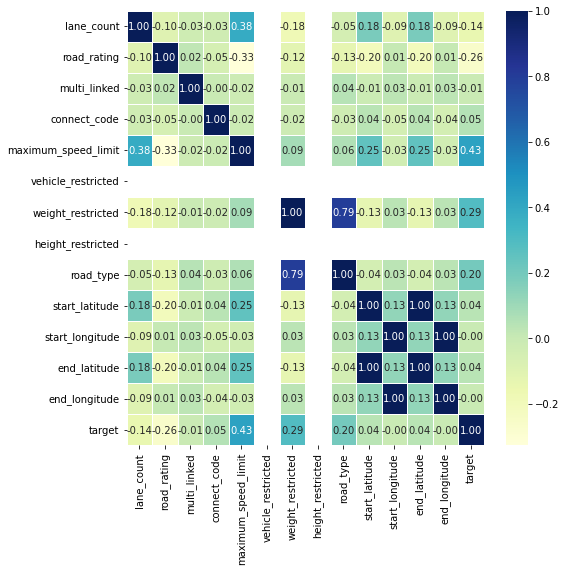

In [12]:
corr = train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', linewidth=0.5)